In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
import pykitti
import robotdatapy
import datetime as dt
from robotdatapy.data import ImgData, PoseData
from robotdatapy.transform import T_FLURDF
import pandas as pd
from scipy.spatial.transform import Rotation as Rot

In [ ]:
base_path = '/media/yixuany/lucas_pro/KITTI/dataset'
sequence_id = '00'

In [ ]:
pose_data = PoseData.from_kitti(base_path)
rgb_data = ImgData.from_kitti(base_path, kitti_type='rgb')
depth_data = ImgData.from_kitti(base_path, kitti_type='depth')

### Check whether rgb imgs are loaded correctly ###

<Axes: >

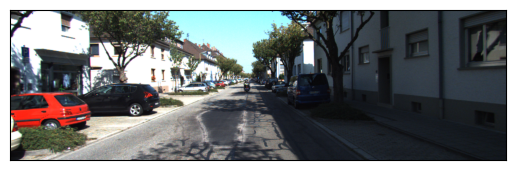

In [4]:
rgb_data.show(3)

### Extract Camera Parameters ###

In [5]:
depth_data.extract_params()

(array([[718.856 ,   0.    , 607.1928],
        [  0.    , 718.856 , 185.2157],
        [  0.    ,   0.    ,   1.    ]]),
 array([0., 0., 0., 0.]))

In [6]:
rgb_data.extract_params()

(array([[718.856 ,   0.    , 607.1928],
        [  0.    , 718.856 , 185.2157],
        [  0.    ,   0.    ,   1.    ]]),
 array([0., 0., 0., 0.]))

### Check pose data ###

In [ ]:
true_poses = pd.read_csv(base_path + "/poses/" + sequence_id + '.txt', delimiter=' ', header=None)

In [ ]:
print(np.array(true_poses.iloc[29]).reshape((3, 4)))

In [ ]:
pose_data._untransformed_position(3.0)

In [ ]:
Rot.from_quat(pose_data.orientation(3.0)).as_matrix()

### Investigate the Map ###

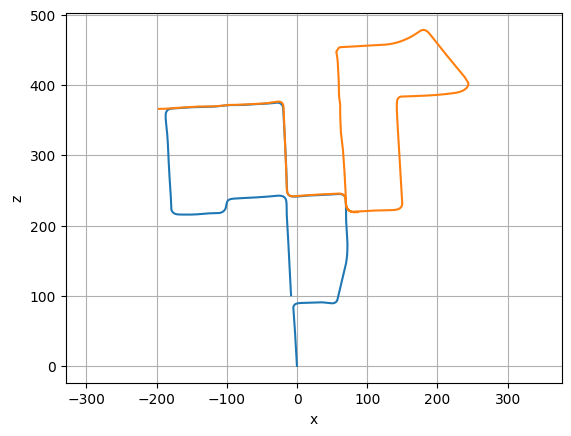

In [9]:
ax = pose_data.plot2d(tf=pose_data.t0+160, axes='xz')
ax = pose_data.plot2d(t0=pose_data.t0+250, tf=pose_data.t0+400, axes='xz')